#### Problem Statement:

Determine significance of different features and build a model for probability of showing traits of being on the Autism Spectrum

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [2]:
df_o = pd.read_csv('./data/Toddler Autism dataset July 2018.csv')

In [3]:
df = pd.read_csv('./data/Toddler Autism dataset July 2018.csv')

In [4]:
df

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,0,0,0,0,0,0,0,0,0,1,24,1,f,White European,no,yes,family member,No
1050,1051,0,0,1,1,1,0,1,0,1,0,12,5,m,black,yes,no,family member,Yes
1051,1052,1,0,1,1,1,1,1,1,1,1,18,9,m,middle eastern,yes,no,family member,Yes
1052,1053,1,0,0,0,0,0,0,1,0,1,19,3,m,White European,no,yes,family member,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

In [6]:
df.isna().sum()

Case_No                   0
A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age_Mons                  0
Qchat-10-Score            0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family_mem_with_ASD       0
Who completed the test    0
Class/ASD Traits          0
dtype: int64

In [7]:
df.columns = df.columns.str.lower()
df

,case_no,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,age_mons,qchat-10-score,sex,ethnicity,jaundice,family_mem_with_asd,who completed the test,class/asd traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,0,0,0,0,0,0,0,0,0,1,24,1,f,White European,no,yes,family member,No
1050,1051,0,0,1,1,1,0,1,0,1,0,12,5,m,black,yes,no,family member,Yes
1051,1052,1,0,1,1,1,1,1,1,1,1,18,9,m,middle eastern,yes,no,family member,Yes
1052,1053,1,0,0,0,0,0,0,1,0,1,19,3,m,White European,no,yes,family member,No


In [8]:
df.rename(columns = {'class/asd traits ':'class_asd_traits', 'who completed the test':'who_completed_test', 'qchat-10-score':'qchat_10_score'}, inplace=True)
#df.rename(columns = {'who completed the test':'who_completed_test'}, inplace=True)
#df.raname()

In [9]:
df.columns

Index(['case_no', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10',
       'age_mons', 'qchat_10_score', 'sex', 'ethnicity', 'jaundice',
       'family_mem_with_asd', 'who_completed_test', 'class_asd_traits'],
      dtype='object')

In [10]:
df.who_completed_test.value_counts()

family member               1018
Health Care Professional      24
Health care professional       5
Self                           4
Others                         3
Name: who_completed_test, dtype: int64

In [11]:
df.ethnicity.value_counts()

White European    334
asian             299
middle eastern    188
south asian        60
black              53
Hispanic           40
Others             35
Latino             26
mixed               8
Pacifica            8
Native Indian       3
Name: ethnicity, dtype: int64

In [12]:
df.sex.value_counts()

m    735
f    319
Name: sex, dtype: int64

In [13]:
df.family_mem_with_asd.value_counts()

no     884
yes    170
Name: family_mem_with_asd, dtype: int64

In [14]:
df.jaundice.value_counts()

no     766
yes    288
Name: jaundice, dtype: int64

In [15]:
df.class_asd_traits.value_counts()

Yes    728
No     326
Name: class_asd_traits, dtype: int64

In [16]:
df.columns

Index(['case_no', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10',
       'age_mons', 'qchat_10_score', 'sex', 'ethnicity', 'jaundice',
       'family_mem_with_asd', 'who_completed_test', 'class_asd_traits'],
      dtype='object')

In [17]:
df['sex'] = df['sex'].map({'m':1, 'f':0})
df['jaundice'] = df['jaundice'].map({'yes':1, 'no':0})
df['family_mem_with_asd'] = df['family_mem_with_asd'].map({'yes':1, 'no':0})
df['class_asd_traits'] = df['class_asd_traits'].map({'Yes':1, 'No':0})
df

,case_no,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,age_mons,qchat_10_score,sex,ethnicity,jaundice,family_mem_with_asd,who_completed_test,class_asd_traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,0,middle eastern,1,0,family member,0
1,2,1,1,0,0,0,1,1,0,0,0,36,4,1,White European,1,0,family member,1
2,3,1,0,0,0,0,0,1,1,0,1,36,4,1,middle eastern,1,0,family member,1
3,4,1,1,1,1,1,1,1,1,1,1,24,10,1,Hispanic,0,0,family member,1
4,5,1,1,0,1,1,1,1,1,1,1,20,9,0,White European,0,1,family member,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,0,0,0,0,0,0,0,0,0,1,24,1,0,White European,0,1,family member,0
1050,1051,0,0,1,1,1,0,1,0,1,0,12,5,1,black,1,0,family member,1
1051,1052,1,0,1,1,1,1,1,1,1,1,18,9,1,middle eastern,1,0,family member,1
1052,1053,1,0,0,0,0,0,0,1,0,1,19,3,1,White European,0,1,family member,0


In [18]:
df.age_mons.value_counts()

36    320
24     70
30     67
12     67
28     42
26     36
33     36
34     34
15     31
31     30
35     30
32     30
23     28
22     27
25     26
29     24
27     23
19     21
20     21
14     19
13     18
18     16
21     13
16     13
17     12
Name: age_mons, dtype: int64

In [19]:
df.age_mons

0       28
1       36
2       36
3       24
4       20
        ..
1049    24
1050    12
1051    18
1052    19
1053    24
Name: age_mons, Length: 1054, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   case_no              1054 non-null   int64 
 1   a1                   1054 non-null   int64 
 2   a2                   1054 non-null   int64 
 3   a3                   1054 non-null   int64 
 4   a4                   1054 non-null   int64 
 5   a5                   1054 non-null   int64 
 6   a6                   1054 non-null   int64 
 7   a7                   1054 non-null   int64 
 8   a8                   1054 non-null   int64 
 9   a9                   1054 non-null   int64 
 10  a10                  1054 non-null   int64 
 11  age_mons             1054 non-null   int64 
 12  qchat_10_score       1054 non-null   int64 
 13  sex                  1054 non-null   int64 
 14  ethnicity            1054 non-null   object
 15  jaundice             1054 non-null   int64 
 16  family

<AxesSubplot:>

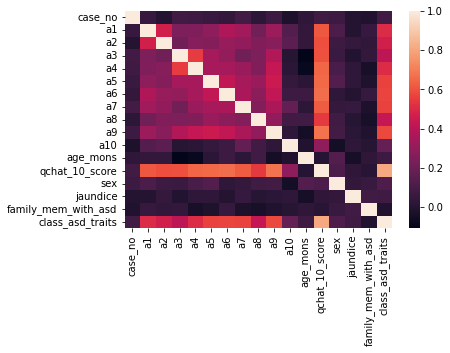

In [21]:
sns.heatmap(df.corr())

In [22]:
#sns.pairplot(df)

In [23]:
df_ethnicity = df[['ethnicity', 'class_asd_traits']]
df_who = df[['who_completed_test', 'class_asd_traits']]

In [24]:
df_ethnicity_enc = pd.get_dummies(df_ethnicity, columns=['ethnicity'])
df_ethnicity_enc

,class_asd_traits,ethnicity_Hispanic,ethnicity_Latino,ethnicity_Native Indian,ethnicity_Others,ethnicity_Pacifica,ethnicity_White European,ethnicity_asian,ethnicity_black,ethnicity_middle eastern,ethnicity_mixed,ethnicity_south asian
0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,0,0
3,1,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1049,0,0,0,0,0,0,1,0,0,0,0,0
1050,1,0,0,0,0,0,0,0,1,0,0,0
1051,1,0,0,0,0,0,0,0,0,1,0,0
1052,0,0,0,0,0,0,1,0,0,0,0,0


<AxesSubplot:>

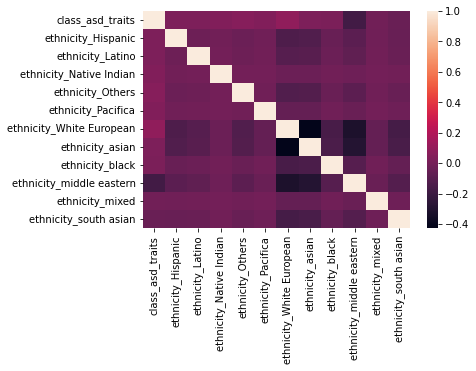

In [25]:
sns.heatmap(df_ethnicity_enc.corr())

In [26]:
df_who = pd.get_dummies(df_who, columns=['who_completed_test'])

In [27]:
df_who

,class_asd_traits,who_completed_test_Health Care Professional,who_completed_test_Health care professional,who_completed_test_Others,who_completed_test_Self,who_completed_test_family member
0,0,0,0,0,0,1
1,1,0,0,0,0,1
2,1,0,0,0,0,1
3,1,0,0,0,0,1
4,1,0,0,0,0,1
...,...,...,...,...,...,...
1049,0,0,0,0,0,1
1050,1,0,0,0,0,1
1051,1,0,0,0,0,1
1052,0,0,0,0,0,1


<AxesSubplot:>

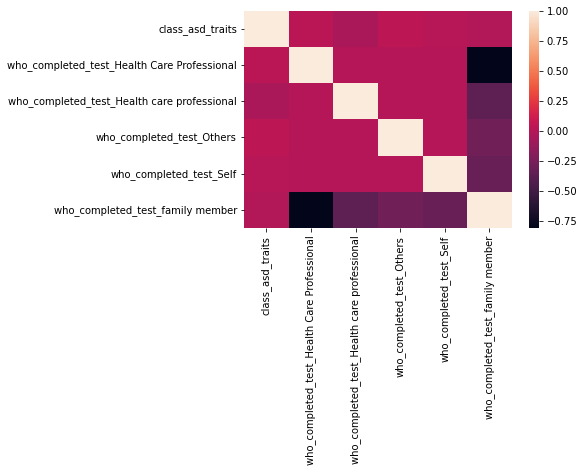

In [28]:
sns.heatmap(df_who.corr())

In [29]:
df.drop(columns = 'who_completed_test', inplace=True)

In [30]:
df = pd.get_dummies(df, columns=['ethnicity'])

In [31]:
df.columns

Index(['case_no', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10',
       'age_mons', 'qchat_10_score', 'sex', 'jaundice', 'family_mem_with_asd',
       'class_asd_traits', 'ethnicity_Hispanic', 'ethnicity_Latino',
       'ethnicity_Native Indian', 'ethnicity_Others', 'ethnicity_Pacifica',
       'ethnicity_White European', 'ethnicity_asian', 'ethnicity_black',
       'ethnicity_middle eastern', 'ethnicity_mixed', 'ethnicity_south asian'],
      dtype='object')

In [32]:
##corr() to class_asd_traits

In [33]:
df

,case_no,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,ethnicity_Latino,ethnicity_Native Indian,ethnicity_Others,ethnicity_Pacifica,ethnicity_White European,ethnicity_asian,ethnicity_black,ethnicity_middle eastern,ethnicity_mixed,ethnicity_south asian
0,1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
1,2,1,1,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3,1,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
3,4,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,5,1,1,0,1,1,1,1,1,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1050,1051,0,0,1,1,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
1051,1052,1,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0
1052,1053,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [34]:
df.columns

Index(['case_no', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10',
       'age_mons', 'qchat_10_score', 'sex', 'jaundice', 'family_mem_with_asd',
       'class_asd_traits', 'ethnicity_Hispanic', 'ethnicity_Latino',
       'ethnicity_Native Indian', 'ethnicity_Others', 'ethnicity_Pacifica',
       'ethnicity_White European', 'ethnicity_asian', 'ethnicity_black',
       'ethnicity_middle eastern', 'ethnicity_mixed', 'ethnicity_south asian'],
      dtype='object')

In [35]:
cols_sc = ['age_mons', 'qchat_10_score']
sc = StandardScaler()
df[cols_sc] = sc.fit_transform(df[cols_sc])

In [36]:
df

,case_no,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,ethnicity_Latino,ethnicity_Native Indian,ethnicity_Others,ethnicity_Pacifica,ethnicity_White European,ethnicity_asian,ethnicity_black,ethnicity_middle eastern,ethnicity_mixed,ethnicity_south asian
0,1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
1,2,1,1,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3,1,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
3,4,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,5,1,1,0,1,1,1,1,1,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1050,1051,0,0,1,1,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
1051,1052,1,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0
1052,1053,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [37]:
df.age_mons

0       0.016652
1       1.019590
2       1.019590
3      -0.484817
4      -0.986286
          ...   
1049   -0.484817
1050   -1.989223
1051   -1.237020
1052   -1.111653
1053   -0.484817
Name: age_mons, Length: 1054, dtype: float64

In [38]:
df.qchat_10_score

0      -0.761384
1      -0.417259
2      -0.417259
3       1.647488
4       1.303364
          ...   
1049   -1.449633
1050   -0.073135
1051    1.303364
1052   -0.761384
1053    0.270990
Name: qchat_10_score, Length: 1054, dtype: float64

<AxesSubplot:>

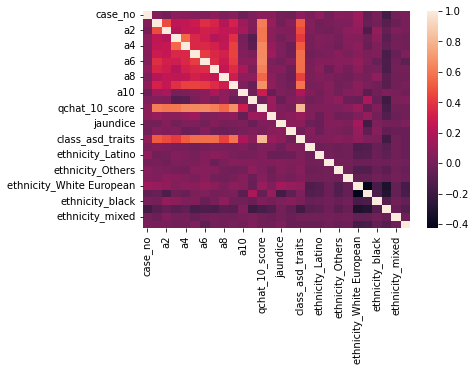

In [39]:
sns.heatmap(df.corr())

In [40]:
#It is recommended to discard the Score variable as it has been used to assign the class label 
df = df.drop(columns='qchat_10_score')
df.columns

Index(['case_no', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10',
       'age_mons', 'sex', 'jaundice', 'family_mem_with_asd',
       'class_asd_traits', 'ethnicity_Hispanic', 'ethnicity_Latino',
       'ethnicity_Native Indian', 'ethnicity_Others', 'ethnicity_Pacifica',
       'ethnicity_White European', 'ethnicity_asian', 'ethnicity_black',
       'ethnicity_middle eastern', 'ethnicity_mixed', 'ethnicity_south asian'],
      dtype='object')

In [41]:
df.to_csv('./data/autism_dataset_cleaned.csv')

In [42]:
df

,case_no,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,ethnicity_Latino,ethnicity_Native Indian,ethnicity_Others,ethnicity_Pacifica,ethnicity_White European,ethnicity_asian,ethnicity_black,ethnicity_middle eastern,ethnicity_mixed,ethnicity_south asian
0,1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
1,2,1,1,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3,1,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
3,4,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,5,1,1,0,1,1,1,1,1,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1050,1051,0,0,1,1,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
1051,1052,1,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0
1052,1053,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [43]:
df_qs = df[['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10', 'class_asd_traits']]

In [44]:
#Correlation by quetsion
pd.DataFrame(df_qs.corrwith(df['class_asd_traits']), columns=['corr.']).sort_values('corr.', ascending=False)

,corr.
class_asd_traits,1.000000
a9,0.577336
a6,0.569424
a5,0.563297
a7,0.563177
a4,0.505204
a1,0.503810
a2,0.463467
a8,0.427155
a3,0.409701


In [45]:
df.columns

Index(['case_no', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10',
       'age_mons', 'sex', 'jaundice', 'family_mem_with_asd',
       'class_asd_traits', 'ethnicity_Hispanic', 'ethnicity_Latino',
       'ethnicity_Native Indian', 'ethnicity_Others', 'ethnicity_Pacifica',
       'ethnicity_White European', 'ethnicity_asian', 'ethnicity_black',
       'ethnicity_middle eastern', 'ethnicity_mixed', 'ethnicity_south asian'],
      dtype='object')

In [46]:
X = df.drop(columns = ['class_asd_traits'])
y = df['class_asd_traits']

In [47]:
df_sex = df.groupby('sex')

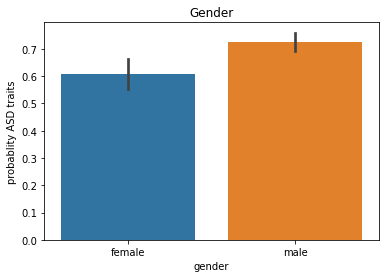

In [48]:
sns.barplot(x=df['sex'], y=df['class_asd_traits'])
plt.title('Gender')
plt.xlabel('gender')
plt.ylabel('probablity ASD traits')
plt.xticks(ticks=[0, 1], labels=['female', 'male']);

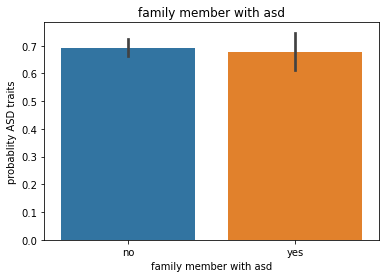

In [49]:
sns.barplot(x=df['family_mem_with_asd'], y=df['class_asd_traits'])
plt.title('family member with asd')
plt.xlabel('family member with asd')
plt.ylabel('probablity ASD traits')
plt.xticks(ticks=[0, 1], labels=['no', 'yes']);

In [50]:
df_ethnicity

,ethnicity,class_asd_traits
0,middle eastern,0
1,White European,1
2,middle eastern,1
3,Hispanic,1
4,White European,1
...,...,...
1049,White European,0
1050,black,1
1051,middle eastern,1
1052,White European,0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'middle eastern'),
  Text(1, 0, 'White European'),
  Text(2, 0, 'Hispanic'),
  Text(3, 0, 'black'),
  Text(4, 0, 'asian'),
  Text(5, 0, 'south asian'),
  Text(6, 0, 'Native Indian'),
  Text(7, 0, 'Others'),
  Text(8, 0, 'Latino'),
  Text(9, 0, 'mixed'),
  Text(10, 0, 'Pacifica')])

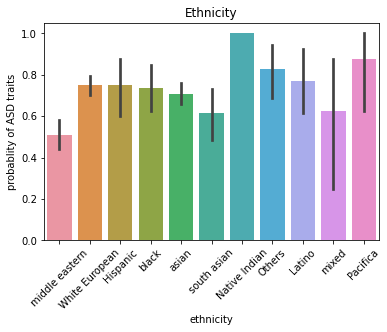

In [51]:
sns.barplot(x=df_ethnicity['ethnicity'], y=df_ethnicity['class_asd_traits'])
plt.title('Ethnicity')
plt.xlabel('ethnicity')
plt.ylabel('probablity of ASD traits');
plt.xticks(rotation=45)

In [53]:
df_qs = df[['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10', 'class_asd_traits']]
#planned to do more analysis of the questions